Theory
Darcy: $$ \vec{u} = - \frac{K}{\mu} \nabla P $$
Continuity: $$ \nabla \cdot \vec{u} = 0 $$
B.C.: $$ P = 0 \; \text{at flow front}$$ $$ \vec{u} \cdot \vec{n} = 0 \; \text{at mould wall}$$
Cure is exotermic. Analysis must be 3D. 

The partial differential equations then read

$$ \vec{u} +\frac{K}{\mu} \nabla P = 0 $$
$$ \nabla \cdot \vec{u} = 0 $$

After multiplying by test functions $\tau$ and $\upsilon$, integrating over the domain, and integrating the gradient term by parts, one obtains the following variational formulation: find $\sigma \in \Sigma$ and $v \in V$ satisfying

$$ \int_{\Omega} (u \cdot \tau + \frac{K}{\mu} \cdot \nabla \cdot \tau \cdot P) \ {\rm d} x = \int_{\Gamma} \tau \cdot n \cdot P \ {\rm d} s \quad \forall \ \tau \in \Sigma $$

$$ \int_{\Omega} (\nabla \cdot u \cdot v )\ {\rm d} x = 0 $$ 

Here $n$ denotes the outward pointing normal vector on the boundary. Looking at the variational form, we see that the boundary condition for the flux $\sigma \cdot n = g$ is now an essential boundary condition (which should be enforced in the function space), while the other boundary condition $u = u_0$ is a natural boundary condition (which should be applied to the variational form). Inserting the boundary conditions, this variational problem can be phrased in the general form: find $(\sigma, u) \in \Sigma_g \times V$ such that

$$ a((\sigma, u), (\tau, v)) = L((\tau, v)) \quad \forall \ (\tau, v) \in \Sigma_0 \times V $$

where the variational forms \(a\) and \(L\) are defined as

$$ a((u, P), (\tau, v)) = \int_{\Omega} u \cdot \tau + \frac{K}{\mu} \cdot \nabla \cdot \tau \cdot P + \nabla \cdot u \cdot v \ {\rm d} x \\ $$

$$ L((\tau, v)) = - \int_{\Omega} f v \ {\rm d} x + \int_{\Gamma_D} u_0 \tau \cdot n \ {\rm d} s $$


$f=0$ and $u_0=0$:

$$ L((\tau, v)) = 0  $$

and 

$\Sigma_g = \{ \tau \in H({\rm div})$ such that  $\tau \cdot n|_{\Gamma_N} = g \}$ and $V = L^2(\Omega)$.




Heat equillibrium between resin and mould is valid in slow process (RTM), not in fast process (SRIM). 
Shell (thin) geometry -> in-plane conduction and transverse convection are negligible. 
Peclet number low -> heat dispersion due to porosity is negligible.

Energy: 
$$\left[\phi (\rho \cdot c_p)_f + (1-\phi)(\rho \cdot c_p)_s \right] \frac{\partial T}{\partial t} (\rho \cdot c_p)_f \cdot \vec{u} \cdot \nabla T = k \frac{\partial^2 T}{\partial z^2} + \phi \dot{s}$$

$ \phi = 1 - V_f $ is porosity 
$ V_f $ is fibre volume fraction 
$ \dot{s} $ is source, due to cure
$$ \kappa = \kappa_f \frac{(\kappa_f + \kappa_r) + (\kappa_f - \kappa_r)(1-\phi)}{(\kappa_f + \kappa_r) - (\kappa_f - \kappa_r)(1-\phi)}$$
B.C.: look (7), (8)
Numerical simulation
FE/CV:
rough approximation of domain shape
mass conservation
no remeshing
Pressure
Bilinear shape functions, Galerkin method (interpolation functions are weighting functions)
$$ [S^e] [P] = 0 $$
B.C. at injection: $$ [S^e] [P_i] = Q_{bc} $$

1) $ \text{Прямоугольный домен} $
2) $ f, g = 0 => L =0$
3) $\text{Точка инжекции} \ p_{инж}  = 1, \text{c координатами} (1,1)$
4) $\text{Точка выхода}   \ p_{вых}  = 0, \text{c координатами} (1,3)$

In [1]:
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

In [2]:
# Create mesh and define function space

nx, ny = 20, 40
mesh   = RectangleMesh(Point(0, 0), Point(2, 4), nx, ny)

BDM = FiniteElement("BDM", mesh.ufl_cell(), 1)
DG  = FiniteElement("DG", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, BDM * DG)

H = Function(W)
u,p = split (H)
(v, q)   = TestFunctions(W)
n        = FacetNormal(mesh)

F = (dot(u,v) - div(v)*p - div(u)*q)*dx

In [3]:
def b_right(x, on_boundary):
    return near(x[0],2) and on_boundary                     # right boundary (2,0)

def b_left(x, on_boundary):
    return near(x[0],0) and on_boundary                     # left boundary (0,0)

# W.sub(0) - Векторное поле скоростей u;
# W.sub(1) - Скалярное поле давления p

bc_left  = DirichletBC(W.sub(1), Constant (1),    b_left)                       # Dirichlet (p=0) on left boundary
bc_right = DirichletBC(W.sub(1), Constant (0),   b_right)                       # Dirichlet (p=0) on right boundary

Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 0.000e+00 (tol = 1.000e-10) r (rel) = nan (tol = 1.000e-09)
  Newton solver finished in 0 iterations and 0 linear solver iterations.


/Users/ivanvasilev/opt/anaconda3/envs/fenicsproject/lib/python3.9/site-packages/matplotlib/quiver.py:679: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/ivanvasilev/opt/anaconda3/envs/fenicsproject/lib/python3.9/site-packages/matplotlib/quiver.py:679: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


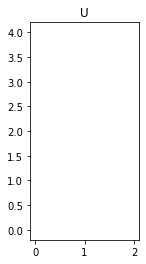

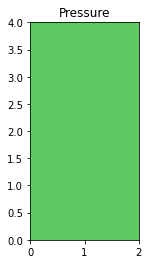

In [4]:
# Compute primal solution
w = Function(W)
J = derivative(F, w)
solve(F == 0, w, J=J, bcs = [bc_left, bc_right])
(u, p) = w.split()

#file = File("flow.pvd")
plot(u, title = 'U')
#plt.savefig('Velocity.png')
plt.show()

#file = File("pressure.pvd")
plot(p, title = 'Pressure')
#plt.savefig('P.png')
plt.show()